# Measure clad height from image

Initial setup

In [45]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Imports

In [8]:
import cv2
import matplotlib
import numpy as np
from matplotlib import pyplot as plt

Compare original with gray scale image

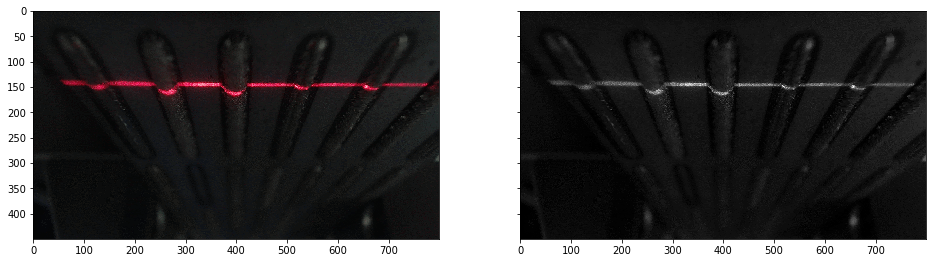

In [10]:
# Load the image in color (OpenCV standard = BGR)
orig = cv2.imread("./img/frames/png/frame_15_delay-0.2s.png", cv2.IMREAD_COLOR)
# Convert to RGB
orig = cv2.cvtColor(orig, cv2.COLOR_BGR2RGB)

# Load the image in grayscale
gray = cv2.imread("./img/frames/png/frame_15_delay-0.2s.png", cv2.IMREAD_GRAYSCALE)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(gray, 'gray')

Gray scale images may show regions that are not relevant. Maybe a better idea would be to apply threshold in the original image to find red regions

## Rotate image

### Rotate, but cropping borders

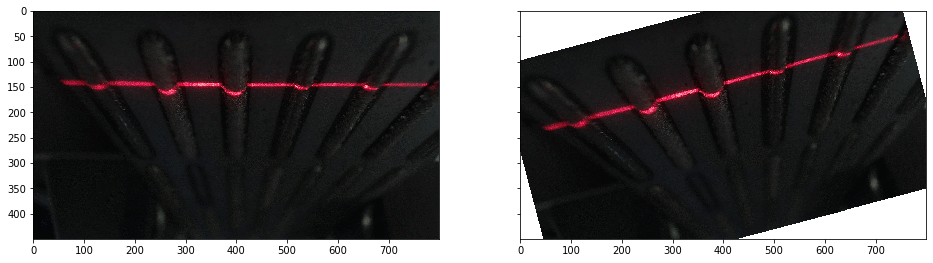

In [40]:
# https://stackoverflow.com/questions/52617318/python-rotate-image

from PIL import Image

def rotate_img(img_path, rt_degr):
    img = Image.open(img_path)
    return img.rotate(rt_degr)

img_rt_90 = rotate_img('./img/frames/png/frame_15_delay-0.2s.png', 15)

fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(img_rt_90)


### Rotate without cropping borders

Source: 

https://stackoverflow.com/posts/37347070/revisions
    
within

https://stackoverflow.com/questions/22041699/rotate-an-image-without-cropping-in-opencv-in-c/33564950#33564950
    

In [41]:
def rotate_image(mat, angle):
  # angle in degrees

  height, width = mat.shape[:2]
  image_center = (width/2, height/2)

  rotation_mat = cv2.getRotationMatrix2D(image_center, angle, 1.)

  abs_cos = abs(rotation_mat[0,0])
  abs_sin = abs(rotation_mat[0,1])

  bound_w = int(height * abs_sin + width * abs_cos)
  bound_h = int(height * abs_cos + width * abs_sin)

  rotation_mat[0, 2] += bound_w/2 - image_center[0]
  rotation_mat[1, 2] += bound_h/2 - image_center[1]

  rotated_mat = cv2.warpAffine(mat, rotation_mat, (bound_w, bound_h))
  return rotated_mat

Implementation

In [43]:

img_rt_30 = rotate_image(orig, 30)

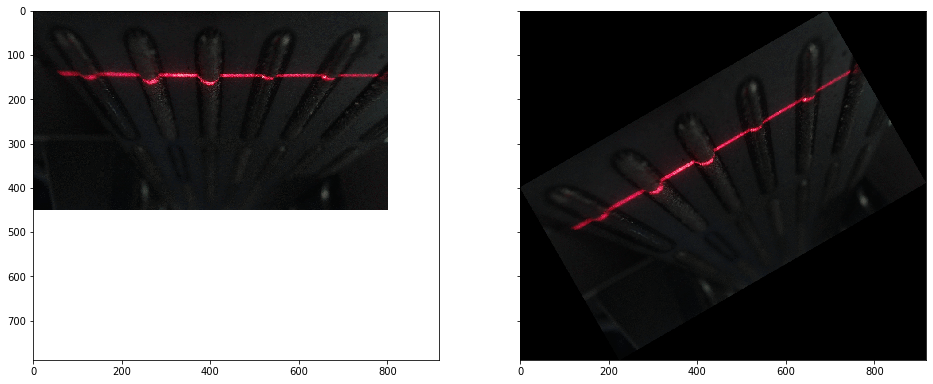

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(16, 12), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(orig)
ax[1].imshow(img_rt_30)